## Intro to Pandas and Numpy

-----


# Pandas

## What is Pandas?
A Python library providing data structures and data analysis tools. The name comes from "panel data"; think about it as a way to visualize and sift through tables of data, similar to R or (heaven forfend) Excel.


## Benefits

* Efficient storage and processing of data.
* Includes many built in functions for data transformation, aggregations, and plotting.
* Great for exploratory work.

## Not so greats

* Does not scale terribly well to large datasets.

## Documentation:

* http://pandas.pydata.org/pandas-docs/stable/index.html

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [180]:
#For fake data.
from numpy.random import randn
np.random.randn(3,4)

array([[ 0.28050354, -1.24917244,  1.40459205,  0.30784802],
       [ 0.07591504,  1.11855522,  0.45868885,  0.42925682],
       [ 0.52357405, -0.59141354, -0.32873901, -0.50672057]])

# Pandas 
* They are built on top of NumPy NdArrays
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

## Objectives

* Create `Series` and `DataFrame`s from Python data types. 
* Create `DataFrame`s from on disk data.
* Index and Slice `pandas` objects.
* Aggregate data in `DataFrame`s.
* Join multiple `DataFrame`s.

# Pandas is built on Numpy
* Numpy is one of the fundamental packages for scientific computing in Python.


## Numpy Arrays
* Or NdArrays (n-dimensional array)
* They are like lists in Python however they allow faster computation
    1. They are stored as one contiguous block of memory, rather than being spread out across multiple locations like a list. 
    2. Each item in a numpy array is of the same data type (i.e. all integers, all floats, etc.), rather than a conglomerate of any number of data types (as a list is). We call this idea homogeneity, as opposed to the possible heterogeneity of Python lists.


Just how much faster are they? Let's take the numbers from 0 to 1 million, and sum those numbers, timing it with both a list and a numpy array.


In [181]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

print("python list")
time = %timeit -r 1 -o sum(python_list)
print (time.all_runs[0]/time.loops )

print("\n" + "numpy array")
time = %timeit -r 1 -o np.sum(numpy_array)
print (time.all_runs[0]/time.loops)

print("\n" + "numpy array -- standard library sum")
time = %timeit -r 1 -o sum(numpy_array)
print(time.all_runs[0]/time.loops)

python list
16.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
0.01620742335999239

numpy array
484 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
0.00048387377699964416

numpy array -- standard library sum
163 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
0.16299906080002985


In [182]:
ints = np.array(range(3))
chars = np.array(list('ABC'))
strings = np.array(['A','BC',"DEF"])

print(ints.dtype, chars.dtype, strings.dtype)

int64 <U1 <U3


In [183]:
chars


array(['A', 'B', 'C'], dtype='<U1')

In [184]:
strings

array(['A', 'BC', 'DEF'], dtype='<U3')

In [185]:
ints

array([0, 1, 2])

In [186]:
ints*0.3

array([0. , 0.3, 0.6])

In [187]:
(ints*0.3).dtype

dtype('float64')

In [188]:
my_lst_ndarray = np.array([1, 2, 3, 4, 5])
my_tuple_ndarray = np.array((1, 2, 3, 4, 5), np.int32)
print(my_lst_ndarray.dtype)
print(my_tuple_ndarray.dtype)

int64
int32


In [189]:
print(my_lst_ndarray.shape)
print(my_tuple_ndarray.shape)

(5,)
(5,)


In [190]:
nd_arr = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15]])
nd_arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [191]:
nd_arr[1,1]

7

In [192]:
nd_arr[0:2,0:2]

array([[1, 2],
       [6, 7]])

In [193]:
nd_arr.shape

(3, 5)

In [194]:
nd_arr.sum()

120

In [195]:
nd_arr.sum(axis=1)

array([15, 40, 65])

In [196]:
nd_arr.sum(axis=0)

array([18, 21, 24, 27, 30])

In [197]:
nd_arr.max()

15

# Broadcasting

In [198]:
a = np.array([10, -10]) 
b = np.array([1, -1])
c = np.array([0.5, 4, 1])

In [199]:
a

array([ 10, -10])

In [200]:
b

array([ 1, -1])

In [201]:
a+b

array([ 11, -11])

In [202]:
c

array([0.5, 4. , 1. ])

In [203]:
#a+c

In [204]:
a = np.array([[10], [-10]]) 
b = np.array([[1, 2], [-1, -2]]) 

print(a)
print('\n')
print(b)
print("\n\n")
print(a + b)

# elements will "duplicate, expand, and fill up" 
# to make the dimensions compatible for element-wise operations

[[ 10]
 [-10]]


[[ 1  2]
 [-1 -2]]



[[ 11  12]
 [-11 -12]]


In [205]:
print(a)
print(a+4)
print(a*3)

[[ 10]
 [-10]]
[[14]
 [-6]]
[[ 30]
 [-30]]


In [206]:
a = np.array([[10, 0, -10, 0],[-10, 0, -10, 0]]) 
b = np.array([[2,2],[-1,0]]) 
print (a.shape, b.shape )
print(a)
print('\n')
print(b)
print("\n\n")
print ("")
# print (a + b)

(2, 4) (2, 2)
[[ 10   0 -10   0]
 [-10   0 -10   0]]


[[ 2  2]
 [-1  0]]






----------------------------------------------------

# Pandas 


## Pandas Series
* are (one dimensional) np.ndarray vectors **with an index**
* They are built upon NdArrays

In [207]:
series = pd.Series([5775,373,7,42,np.nan,33])
print(series)
print("\n")
print(series.shape)

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


In [208]:
world_series = pd.Series(["cubs","royals","giants","sox","giants","cards","giants","...",None])
world_series

0      cubs
1    royals
2    giants
3       sox
4    giants
5     cards
6    giants
7       ...
8      None
dtype: object

In [209]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31    0.559100
2015-02-28    0.486655
2015-03-31   -0.137920
2015-04-30   -1.476348
2015-05-31   -0.272912
2015-06-30   -0.078480
2015-07-31    0.376391
2015-08-31    0.419673
2015-09-30   -0.082920
2015-10-31    0.567495
Freq: M, dtype: float64

In [210]:
dt_series.mean()

0.03607340088760184

# Index
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [211]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print(indexed_series)
print('\n')
print(alt_indexed_series)

California   -1.471032
Alabama      -2.023621
Indiana       0.556987
Montana       0.326493
Kentucky     -0.718740
dtype: float64


Washington   -0.795041
Alabama       0.183674
Montana       0.146823
Indiana      -0.219355
New York     -0.962225
dtype: float64


In [212]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama      -1.839947
California         NaN
Indiana       0.337632
Kentucky           NaN
Montana       0.473316
New York           NaN
Washington         NaN
dtype: float64

# Pandas DataFrames
* are a set of Pandas Series **that share the same index** 


In [213]:
pd.DataFrame(
    [[1, 2, 3], [4, 5, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])

,a,b,c
foo,1,2,3
bar,4,5,6


In [214]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,1.495520,-1.210796,0.414761,-1.560338,1.853589
2015-02-28,0.562901,1.283858,-0.282703,0.738118,-1.228165
2015-03-31,1.296550,0.253719,-1.974119,0.084712,-0.395337
2015-04-30,-1.012926,-0.627860,1.560737,0.388049,-0.367956
2015-05-31,-0.350833,0.442091,-1.265229,-0.193456,0.797260
2015-06-30,0.865347,-1.213860,0.549575,0.350332,-1.466043
2015-07-31,0.248995,0.876553,1.103259,-0.782413,-0.682855
2015-08-31,-0.000480,-1.201250,0.588146,-0.350325,-0.592109
2015-09-30,0.556414,-1.272332,0.705019,-1.218709,-0.839649
2015-10-31,-0.148068,-1.798490,1.500908,0.389419,-0.747851


## To select just one column, use brackets


In [215]:
df['a']

2015-01-31    1.495520
2015-02-28    0.562901
2015-03-31    1.296550
2015-04-30   -1.012926
2015-05-31   -0.350833
2015-06-30    0.865347
2015-07-31    0.248995
2015-08-31   -0.000480
2015-09-30    0.556414
2015-10-31   -0.148068
Freq: M, Name: a, dtype: float64

## To select one row, use .loc[]

In [216]:
df.loc['2015-10-31']

a   -0.148068
b   -1.798490
c    1.500908
d    0.389419
e   -0.747851
Name: 2015-10-31 00:00:00, dtype: float64

## A column of a dataframe is a series:

In [217]:
col = df['d']
type(col)

pandas.core.series.Series

## So is a row

In [218]:
row = df.loc['2015-01-31']
type(row)

pandas.core.series.Series

### The columns all have the same index:

In [219]:
col.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [220]:
row.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [221]:
df.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [222]:
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [223]:
df[['a','b']]

,a,b
2015-01-31,1.495520,-1.210796
2015-02-28,0.562901,1.283858
2015-03-31,1.296550,0.253719
2015-04-30,-1.012926,-0.627860
2015-05-31,-0.350833,0.442091
2015-06-30,0.865347,-1.213860
2015-07-31,0.248995,0.876553
2015-08-31,-0.000480,-1.201250
2015-09-30,0.556414,-1.272332
2015-10-31,-0.148068,-1.798490


In [224]:
df['a'] + df['b']

2015-01-31    0.284725
2015-02-28    1.846759
2015-03-31    1.550269
2015-04-30   -1.640786
2015-05-31    0.091257
2015-06-30   -0.348514
2015-07-31    1.125547
2015-08-31   -1.201730
2015-09-30   -0.715918
2015-10-31   -1.946558
Freq: M, dtype: float64

In [225]:
df['h'] = abs(df['a'])**df['b']

In [226]:
df

,a,b,c,d,e,h
2015-01-31,1.495520,-1.210796,0.414761,-1.560338,1.853589,0.614274
2015-02-28,0.562901,1.283858,-0.282703,0.738118,-1.228165,0.478179
2015-03-31,1.296550,0.253719,-1.974119,0.084712,-0.395337,1.068112
2015-04-30,-1.012926,-0.627860,1.560737,0.388049,-0.367956,0.991969
2015-05-31,-0.350833,0.442091,-1.265229,-0.193456,0.797260,0.629352
2015-06-30,0.865347,-1.213860,0.549575,0.350332,-1.466043,1.191907
2015-07-31,0.248995,0.876553,1.103259,-0.782413,-0.682855,0.295617
2015-08-31,-0.000480,-1.201250,0.588146,-0.350325,-0.592109,9685.826223
2015-09-30,0.556414,-1.272332,0.705019,-1.218709,-0.839649,2.108330
2015-10-31,-0.148068,-1.798490,1.500908,0.389419,-0.747851,31.039734


In [227]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,-1.265229,-0.193456,0.797260
2015-06-30,0.549575,0.350332,-1.466043
2015-07-31,1.103259,-0.782413,-0.682855
2015-08-31,0.588146,-0.350325,-0.592109


In [228]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] = 2.7
df

,a,b,c,d,e,h
2015-01-31,1.495520,-1.210796,0.414761,-1.560338,1.853589,0.614274
2015-02-28,0.562901,1.283858,-0.282703,0.738118,-1.228165,0.478179
2015-03-31,1.296550,0.253719,-1.974119,0.084712,-0.395337,1.068112
2015-04-30,-1.012926,-0.627860,1.560737,0.388049,-0.367956,0.991969
2015-05-31,-0.350833,0.442091,2.700000,2.700000,2.700000,0.629352
2015-06-30,0.865347,-1.213860,2.700000,2.700000,2.700000,1.191907
2015-07-31,0.248995,0.876553,2.700000,2.700000,2.700000,0.295617
2015-08-31,-0.000480,-1.201250,2.700000,2.700000,2.700000,9685.826223
2015-09-30,0.556414,-1.272332,0.705019,-1.218709,-0.839649,2.108330
2015-10-31,-0.148068,-1.798490,1.500908,0.389419,-0.747851,31.039734


In [229]:
df.iloc[2:4,2:5] #Ranges by number.

,c,d,e
2015-03-31,-1.974119,0.084712,-0.395337
2015-04-30,1.560737,0.388049,-0.367956


In [230]:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)
df

,0,1,2,3,4
2015-01-31,-0.072695,1.694463,-0.620187,1.223267,0.181423
2015-02-28,-1.614646,-0.486902,0.080309,-0.317098,0.729425
2015-03-31,-0.391533,-0.029799,-0.252428,1.935978,-0.245752
2015-04-30,-0.290774,0.509446,-0.670504,-0.799879,-0.583761
2015-05-31,0.348118,-0.813796,1.605820,0.789404,2.842714
2015-06-30,1.234508,-1.095059,0.983629,0.194105,0.952974
2015-07-31,0.578260,-0.518140,0.399303,-1.355825,0.764933
2015-08-31,0.573295,0.550848,0.724448,-0.173529,0.361755
2015-09-30,0.817178,1.230600,2.410797,0.732470,1.143854
2015-10-31,-2.287213,1.475350,-0.232553,0.331304,2.520658


In [231]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,-0.072695,1.694463,-0.620187,1.223267,0.181423,Alabama
2015-02-28,-1.614646,-0.486902,0.080309,-0.317098,0.729425,Alaska
2015-03-31,-0.391533,-0.029799,-0.252428,1.935978,-0.245752,Arizona
2015-04-30,-0.290774,0.509446,-0.670504,-0.799879,-0.583761,Alabama
2015-05-31,0.348118,-0.813796,1.605820,0.789404,2.842714,Alaska


In [232]:
df = df.reset_index()
df

,index,0,1,2,3,4,state
0,2015-01-31,-0.072695,1.694463,-0.620187,1.223267,0.181423,Alabama
1,2015-02-28,-1.614646,-0.486902,0.080309,-0.317098,0.729425,Alaska
2,2015-03-31,-0.391533,-0.029799,-0.252428,1.935978,-0.245752,Arizona
3,2015-04-30,-0.290774,0.509446,-0.670504,-0.799879,-0.583761,Alabama
4,2015-05-31,0.348118,-0.813796,1.605820,0.789404,2.842714,Alaska
5,2015-06-30,1.234508,-1.095059,0.983629,0.194105,0.952974,Arizona
6,2015-07-31,0.578260,-0.518140,0.399303,-1.355825,0.764933,Alabama
7,2015-08-31,0.573295,0.550848,0.724448,-0.173529,0.361755,Alaska
8,2015-09-30,0.817178,1.230600,2.410797,0.732470,1.143854,Arizona
9,2015-10-31,-2.287213,1.475350,-0.232553,0.331304,2.520658,Alabama


In [233]:
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.072695,1.694463,-0.620187,1.223267,0.181423
Alaska,2015-02-28,-1.614646,-0.486902,0.080309,-0.317098,0.729425
Arizona,2015-03-31,-0.391533,-0.029799,-0.252428,1.935978,-0.245752
Alabama,2015-04-30,-0.290774,0.509446,-0.670504,-0.799879,-0.583761
Alaska,2015-05-31,0.348118,-0.813796,1.605820,0.789404,2.842714


In [234]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.072695,1.694463,-0.620187,1.223267,0.181423
2015-04-30,-0.290774,0.509446,-0.670504,-0.799879,-0.583761
2015-07-31,0.578260,-0.518140,0.399303,-1.355825,0.764933
2015-10-31,-2.287213,1.475350,-0.232553,0.331304,2.520658
2016-01-31,1.431651,-1.608274,0.691973,1.282976,-0.619954


In [235]:
#df.loc['2015-01-31'] #Doesn't work.

In [236]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0   -0.072695
1    1.694463
2   -0.620187
3    1.223267
4    0.181423
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

In [237]:
df = pd.read_csv('data/winequality-red.csv', delimiter=',')

In [238]:
df.head()  #Display the first x rows (default is 5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [239]:
df.shape

(1599, 12)

In [240]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [242]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [243]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Filtering (i.e., row selecting or boolean indexing)

In [244]:
df['chlorides']

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
        ...  
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, Length: 1599, dtype: float64

In [245]:
df['chlorides'] <= 0.08 

0        True
1       False
2       False
3        True
4        True
        ...  
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [246]:
mask = df['chlorides'] <= 0.08
mask

0        True
1       False
2       False
3        True
4        True
        ...  
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [247]:
type(mask)

pandas.core.series.Series

You can use a boolean series to "mask" a dataframe / series, returning only those rows where the mask is `True`

In [248]:
df[mask]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [249]:
# Okay, this is cool. What if I wanted a slightly more complicated query...
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [250]:
df2 = df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)][['pH','fixed acidity']]
df2.head()

,pH,fixed acidity
0,3.51,7.4
3,3.16,11.2
4,3.51,7.4
5,3.51,7.4
6,3.30,7.9


In [251]:
df2.sort_values('pH').reset_index().head()

,index,pH,fixed acidity
0,544,2.86,14.3
1,440,2.88,12.6
2,1017,2.89,8.0
3,1018,2.89,8.0
4,657,2.92,12.0


In [252]:
df2.sort_values('pH').reset_index().head()

,index,pH,fixed acidity
0,544,2.86,14.3
1,440,2.88,12.6
2,1017,2.89,8.0
3,1018,2.89,8.0
4,657,2.92,12.0


In [253]:
df2.sort_values('pH').reset_index(drop=True).head()

,pH,fixed acidity
0,2.86,14.3
1,2.88,12.6
2,2.89,8.0
3,2.89,8.0
4,2.92,12.0


# Groupby

In [254]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [255]:
g = df.groupby('quality') # Note that this returns back to us a groupby object. It doesn't actually 
                      # return to us anything useful until we perform some aggregation on it. 
g

In [256]:
g.max()['density']

quality
3    1.00080
4    1.00100
5    1.00315
6    1.00369
7    1.00320
8    0.99880
Name: density, dtype: float64

In [257]:
# Note we can also group by multilple columns by passing them in in a list. It will group by 
# the first column passed in first, and then the second after that (i.e. it will group by 
# the second within the group by of the first). 
df2 = df.groupby(['pH', 'quality']).count()['chlorides']

df2

pH    quality
2.74  4          1
2.86  6          1
2.87  6          1
2.88  5          1
      8          1
                ..
3.78  7          1
3.85  6          1
3.90  4          1
      6          1
4.01  6          2
Name: chlorides, Length: 270, dtype: int64

# Remove columns

In [258]:
# add a computed column

df['pct_free_sulf'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pct_free_sulf
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.323529
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.373134
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.277778
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.283333
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.323529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.727273
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.764706
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.725000
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.727273


In [259]:
df.drop('pct_free_sulf', axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [260]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'pct_free_sulf'],
      dtype='object')

# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [261]:
miss_val_df = pd.DataFrame(
    [[1, 2, 3], [4, np.nan, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [262]:
miss_val_df.fillna(0)

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [263]:
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [264]:
# IF YOU WANT THE CHANGE TO HAPPEN INPLACE YOU MUST SPECIFY:
miss_val_df.fillna(0,inplace=True)
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [265]:
miss_val_df['b']['foo'] =np.nan

/tmp/ipykernel_24/2021580021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_val_df['b']['foo'] =np.nan


In [266]:
miss_val_df

,a,b,c
foo,1,NaN,3
bar,4,0.0,6


In [267]:
miss_val_df.dropna()

,a,b,c
bar,4,0.0,6


# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html

We can join DataFrames in a similar way that we join tables to SQL.  In fact, left, right, outer, and inner joins work the same way here.

In [268]:
merge1 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['a', 'b', 'c'])

merge2 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['z', 'b', 'y'])

merge1

,a,b,c
0,1,2,3
1,4,3,6


In [269]:
merged_df = merge1.merge(merge2, how='inner')
merged_df

,a,b,c,z,y
0,1,2,3,1,3
1,4,3,6,4,6


# Concatenating
* adding *rows*
* see also: df.append()

In [270]:
df1 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col3': range(5)})
df2 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col4': range(5)},
    index=range(5, 10))
df1

,Col1,Col2,Col3
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [271]:
df2

,Col1,Col2,Col4
5,0,0,0
6,1,1,1
7,2,2,2
8,3,3,3
9,4,4,4


In [272]:
#Vertically
pd.concat([df1, df2], axis=0)

,Col1,Col2,Col3,Col4
0,0,0,0.0,NaN
1,1,1,1.0,NaN
2,2,2,2.0,NaN
3,3,3,3.0,NaN
4,4,4,4.0,NaN
5,0,0,NaN,0.0
6,1,1,NaN,1.0
7,2,2,NaN,2.0
8,3,3,NaN,3.0
9,4,4,NaN,4.0


In [273]:
pd.concat([df1, df2], join='outer', axis=1)

,Col1,Col2,Col3,Col1,Col2,Col4
0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.0,1.0,1.0,NaN,NaN,NaN
2,2.0,2.0,2.0,NaN,NaN,NaN
3,3.0,3.0,3.0,NaN,NaN,NaN
4,4.0,4.0,4.0,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,0.0
6,NaN,NaN,NaN,1.0,1.0,1.0
7,NaN,NaN,NaN,2.0,2.0,2.0
8,NaN,NaN,NaN,3.0,3.0,3.0
9,NaN,NaN,NaN,4.0,4.0,4.0


# Categorical data

In [274]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,windy,temperature,outlook,humidity,play
0,False,85,sunny,95,no
1,True,90,sunny,100,no
2,False,92,overcast,85,yes
3,False,60,rain,50,yes
4,True,58,overcast,60,yes


df.value_counts() gets you the frequencies

In [275]:
df['outlook'].value_counts()

outlook
sunny       5
rain        5
overcast    4
Name: count, dtype: int64

Using apply will get you the value counts for multiple columns at once

In [276]:
df[['outlook','play']].apply(lambda x: x.value_counts())

,outlook,play
no,NaN,5.0
overcast,4.0,NaN
rain,5.0,NaN
sunny,5.0,NaN
yes,NaN,9.0


In [277]:
pd.crosstab(df['outlook'], df['play'])

play,no,yes
outlook,,
overcast,0,4
rain,2,3
sunny,3,2


Often we want the row percentages

In [278]:
pd.crosstab(df['outlook'], df['play']).apply(lambda r: r/r.sum(), axis=1)

play,no,yes
outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


Or the column percentages

In [279]:
pd.crosstab(df['outlook'], df['play']).apply(lambda c: c/c.sum(), axis=0)

play,no,yes
outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


# Plotting DataFrames

In [280]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,windy,temperature,outlook,humidity,play
0,False,85,sunny,95,no
1,True,90,sunny,100,no
2,False,92,overcast,85,yes
3,False,60,rain,50,yes
4,True,58,overcast,60,yes


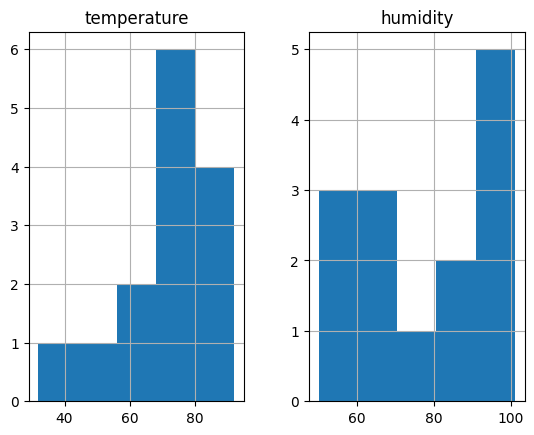

In [281]:
df.hist(['temperature','humidity'],bins=5);

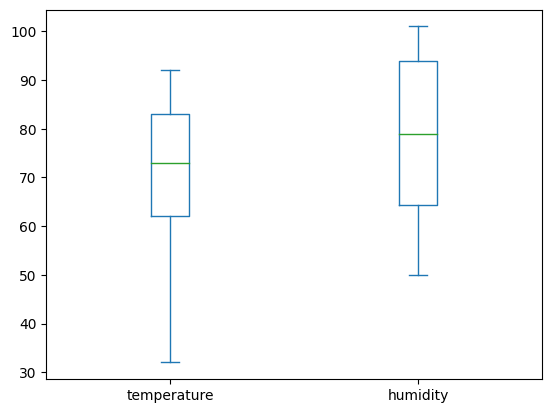

In [282]:
df[['temperature','humidity']].plot(kind='box');

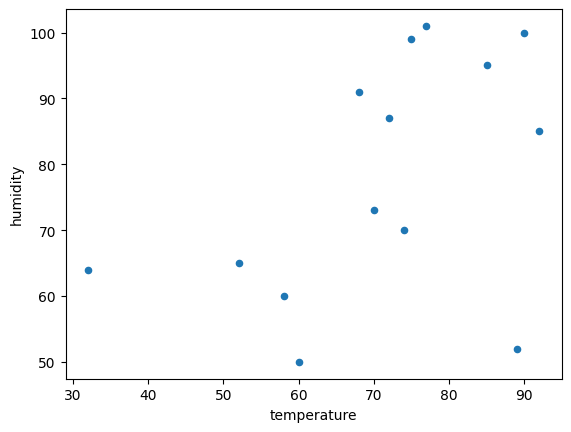

In [283]:
df.plot('temperature', 'humidity', kind='scatter');

In [284]:
groups=df.groupby('outlook')
for name, group in groups:
    print(name)

overcast
rain
sunny


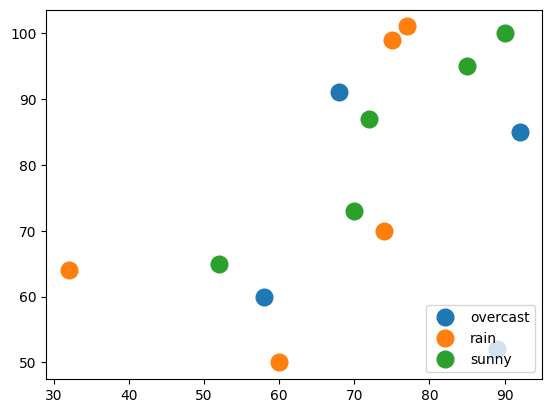

In [285]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.temperature, group.humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

In [286]:
df.head()

,windy,temperature,outlook,humidity,play
0,False,85,sunny,95,no
1,True,90,sunny,100,no
2,False,92,overcast,85,yes
3,False,60,rain,50,yes
4,True,58,overcast,60,yes


In [287]:
df['outlook'].value_counts()

outlook
sunny       5
rain        5
overcast    4
Name: count, dtype: int64

In [288]:
df['windy'].value_counts()

windy
False    8
True     6
Name: count, dtype: int64

In [289]:
g = df.groupby(['outlook', 'windy'])

In [290]:
g.max

<bound method GroupBy.max of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ff98941f9d0>>

In [291]:
g.agg(max)

/tmp/ipykernel_24/3386845609.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  g.agg(max)


temperature  humidity play
outlook  windy                            
overcast False           92        85  yes
         True            68        91  yes
rain     False           77       101  yes
         True            75        99   no
sunny    False           85        95  yes
         True            90       100  yes

In [292]:
df_th = g.agg(max)[['temperature','humidity']]
df_th

/tmp/ipykernel_24/3169059962.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_th = g.agg(max)[['temperature','humidity']]


temperature  humidity
outlook  windy                       
overcast False           92        85
         True            68        91
rain     False           77       101
         True            75        99
sunny    False           85        95
         True            90       100

In [293]:
df_th.unstack()

temperature       humidity      
windy          False True     False True 
outlook                                  
overcast          92    68       85    91
rain              77    75      101    99
sunny             85    90       95   100

In [294]:
df_th.unstack()['temperature']

windy,False,True
outlook,,
overcast,92,68
rain,77,75
sunny,85,90


In [295]:
df_th.reset_index()

,outlook,windy,temperature,humidity
0,overcast,False,92,85
1,overcast,True,68,91
2,rain,False,77,101
3,rain,True,75,99
4,sunny,False,85,95
5,sunny,True,90,100


In [296]:
df

,windy,temperature,outlook,humidity,play
0,False,85,sunny,95,no
1,True,90,sunny,100,no
2,False,92,overcast,85,yes
3,False,60,rain,50,yes
4,True,58,overcast,60,yes
5,False,72,sunny,87,no
6,False,52,sunny,65,yes
7,False,74,rain,70,yes
8,True,70,sunny,73,yes
9,True,68,overcast,91,yes


In [297]:
df.pivot(columns='outlook')

windy               temperature             humidity                \
outlook overcast   rain  sunny    overcast  rain sunny overcast   rain  sunny   
0            NaN    NaN  False         NaN   NaN  85.0      NaN    NaN   95.0   
1            NaN    NaN   True         NaN   NaN  90.0      NaN    NaN  100.0   
2          False    NaN    NaN        92.0   NaN   NaN     85.0    NaN    NaN   
3            NaN  False    NaN         NaN  60.0   NaN      NaN   50.0    NaN   
4           True    NaN    NaN        58.0   NaN   NaN     60.0    NaN    NaN   
5            NaN    NaN  False         NaN   NaN  72.0      NaN    NaN   87.0   
6            NaN    NaN  False         NaN   NaN  52.0      NaN    NaN   65.0   
7            NaN  False    NaN         NaN  74.0   NaN      NaN   70.0    NaN   
8            NaN    NaN   True         NaN   NaN  70.0      NaN    NaN   73.0   
9           True    NaN    NaN        68.0   NaN   NaN     91.0    NaN    NaN   
10         False    NaN    NaN        89.0   NaN   NaN     52.0    NaN    NaN   
11           NaN   True    NaN         NaN  75.0   NaN      NaN   99.0    NaN   
12           NaN   True    NaN         NaN  32.0   NaN      NaN   64.0    NaN   
13           NaN  False    NaN         NaN  77.0   NaN      NaN  101.0    NaN   

            play             
outlook overcast rain sunny  
0            NaN  NaN    no  
1            NaN  NaN    no  
2            yes  NaN   NaN  
3            NaN  yes   NaN  
4            yes  NaN   NaN  
5            NaN  NaN    no  
6            NaN  NaN   yes  
7            NaN  yes   NaN  
8            NaN  NaN   yes  
9            yes  NaN   NaN  
10           yes  NaN   NaN  
11           NaN   no   NaN  
12           NaN   no   NaN  
13           NaN  yes   NaN